In [ ]:
# Step 1: Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc


In [ ]:
# Step 2: Load the dataset
file_path = '/content/obesitydata.csv'
df = pd.read_csv(file_path)

In [ ]:
# Step 3: Explore the dataset
print(df.head())
print(df.info())

   Unnamed: 0  Gender   Age  Height  Weight family_history_with_overweight  \
0           1  Female  21.0    1.62    64.0                            yes   
1           2  Female  21.0    1.52    56.0                            yes   
2           3    Male  23.0    1.80    77.0                            yes   
3           4    Male  27.0    1.80    87.0                             no   
4           5    Male  22.0    1.78    89.8                             no   

  FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   no   2.0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1   no   3.0  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   no   2.0  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   no   3.0  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   no   2.0  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Publi

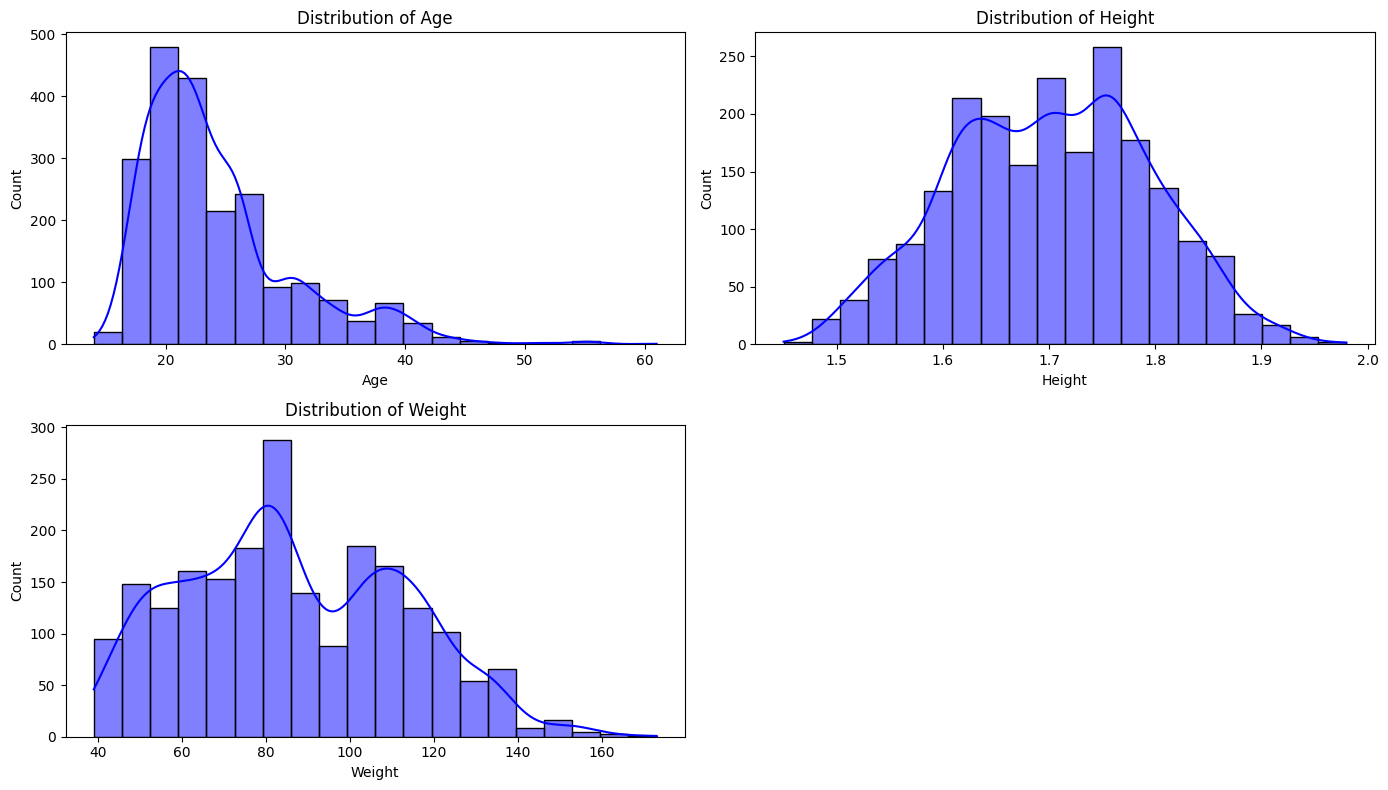

In [ ]:
#Distribution of numerical features
numerical_features = ['Age', 'Height', 'Weight']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

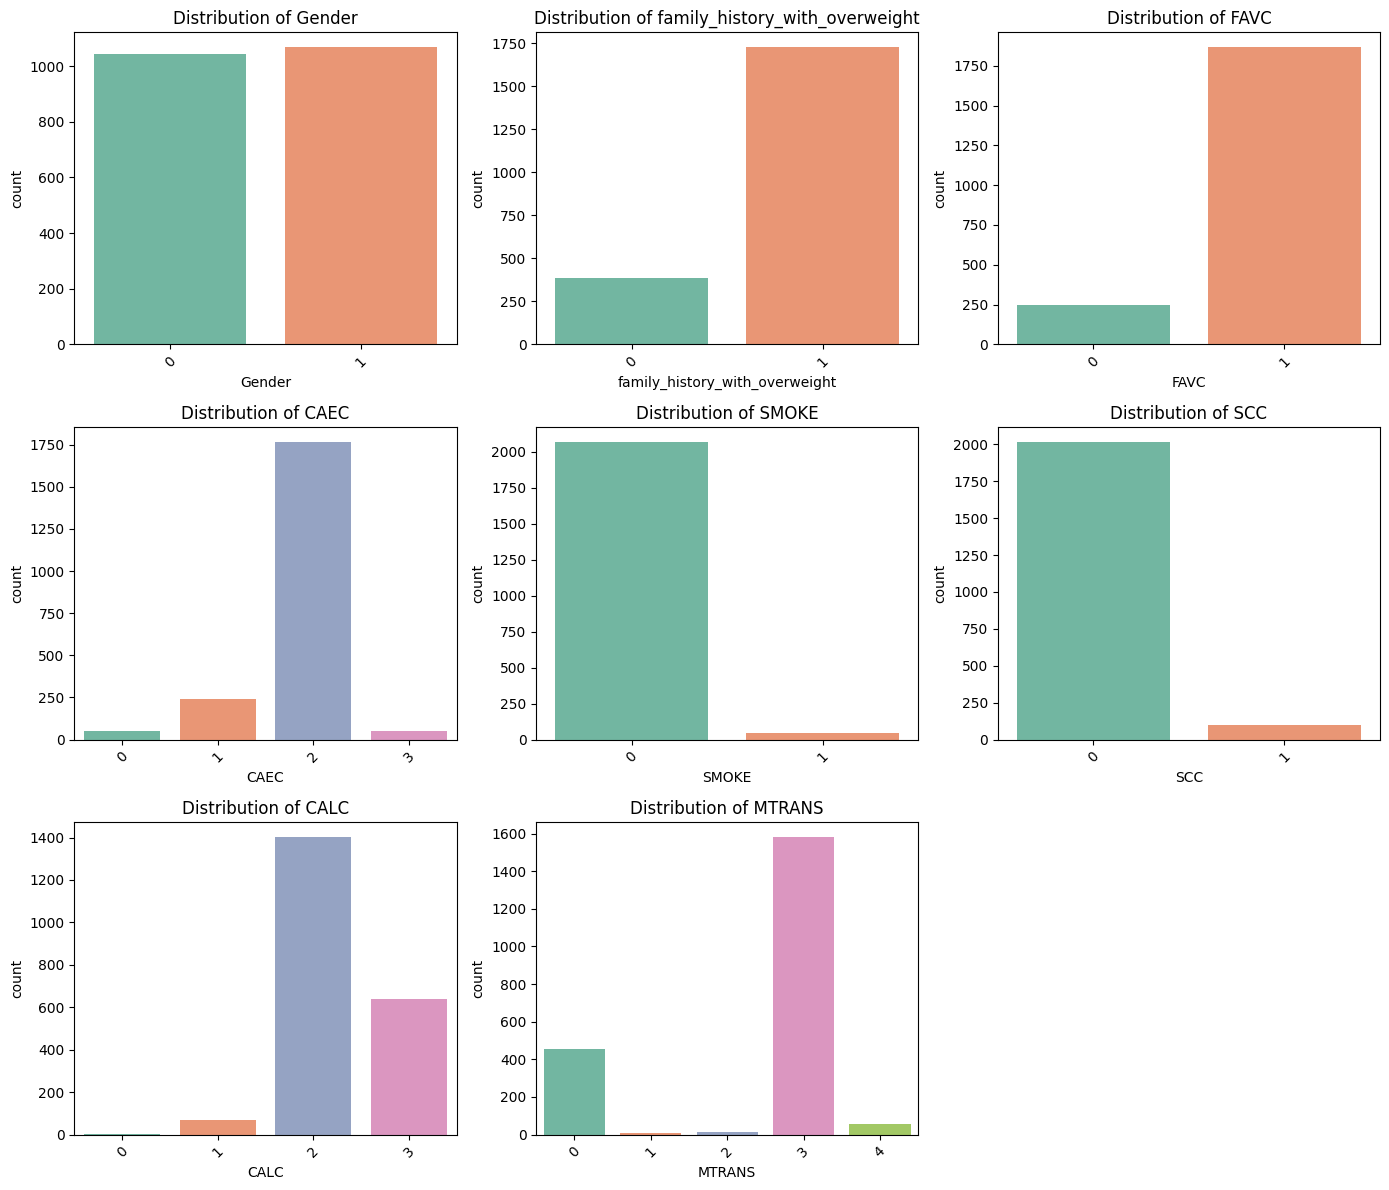

In [ ]:
#Distribution of categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df, hue=feature, palette='Set2')
    plt.legend([],[], frameon=False)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

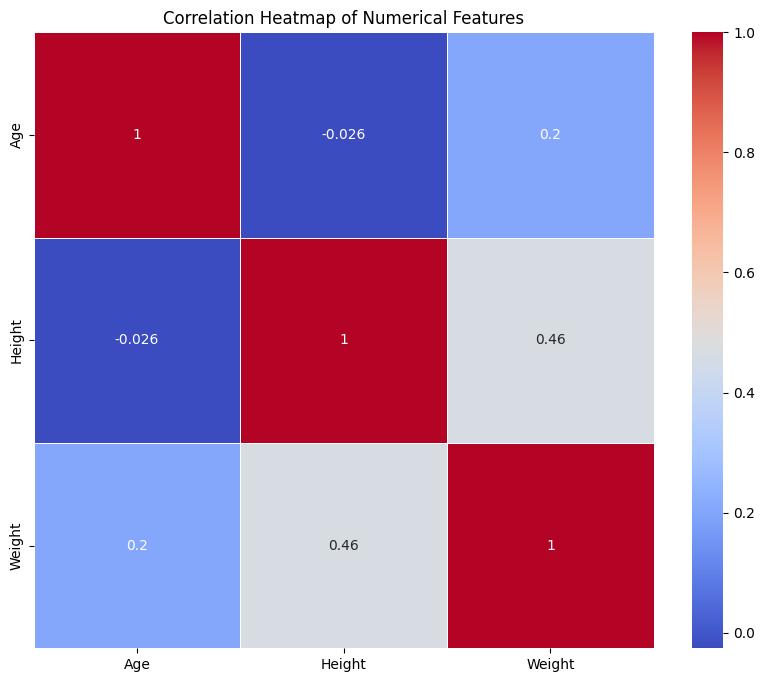

In [ ]:
#Correlation heatmap `
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
#Step 4: Data Pre-processing
df = df.dropna()  # Remove rows with missing values

le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

scaler = StandardScaler()

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Predictions and evaluation
y_pred = clf.predict(X_test)


In [ ]:
# Step 8: Model evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.950354609929078
Confusion Matrix:
 [[54  2  0  0  0  0  0]
 [ 0 60  0  0  0  2  0]
 [ 0  0 73  0  0  2  3]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  8  0  0  0 47  1]
 [ 0  0  0  0  0  1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.86      0.97      0.91        62
           2       0.97      0.94      0.95        78
           3       1.00      0.97      0.98        58
           4       1.00      1.00      1.00        63
           5       0.90      0.84      0.87        56
           6       0.92      0.98      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



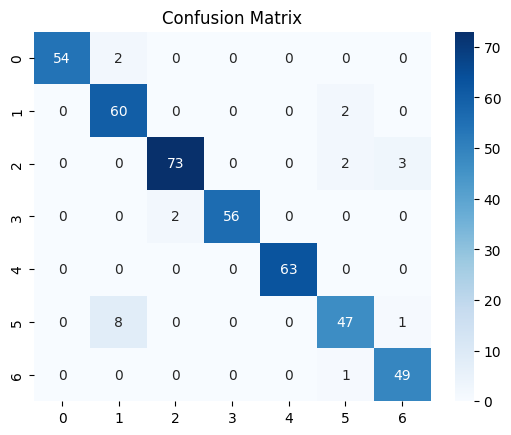

In [ ]:
# Visualizing the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

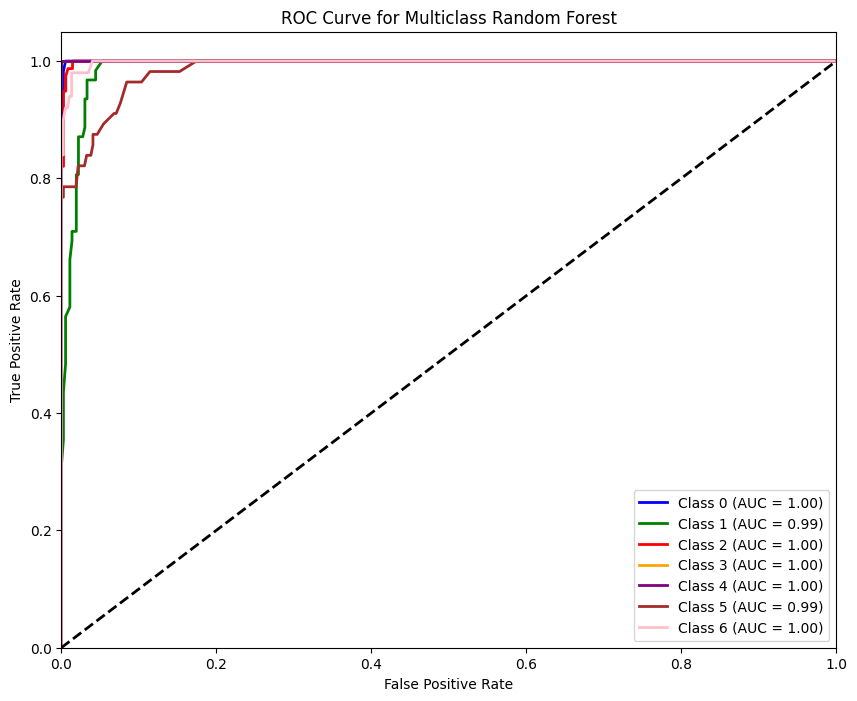

In [ ]:
# Binarize the output (for multiclass classification)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# One-vs-Rest (OvR) Random Forest
clf_ovr = OneVsRestClassifier(RandomForestClassifier(random_state=42))
clf_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y_train)))

# Predict probabilities for the test set
y_pred_prob_rf = clf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Random Forest')
plt.legend(loc='lower right')
plt.show()
